<a href="https://colab.research.google.com/github/niwdehu/ProyectoFinal_INF648/blob/main/Notebooks/2.Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone

pd.set_option("display.max_columns", 50)

In [2]:
#Carga Data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [146]:
!ls
# Cargando data 
#data_link = 'drive/My Drive/Proyecto Final INF648-0001/ObesityDataSet_raw_and_data_sinthetic.csv'
data_link = 'https://raw.githubusercontent.com/niwdehu/ProyectoFinal_INF648/main/DataSets/Dataset_with_SMOTENC.csv'
data = pd.read_csv(data_link)
data.head()

drive  sample_data


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [147]:
#Calculando el IMC = peso (kg) / [estatura (m)]2
data["IMC"]= data["Weight"]/(data["Height"]*data["Height"])

In [148]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [149]:
data.iloc[:,:-1]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,Male,22.123480,1.650000,80.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,no,Walking,Overweight_Level_II
2481,Male,33.301758,1.710947,83.301758,yes,yes,2.0,3.0,Frequently,no,2.0,no,3.0,0.0,Sometimes,Automobile,Overweight_Level_II
2482,Female,27.489696,1.654691,78.000000,yes,yes,3.0,3.0,Sometimes,no,3.0,no,2.0,1.0,Frequently,Automobile,Overweight_Level_II
2483,Male,27.602157,1.921971,101.698921,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Walking,Overweight_Level_II


In [150]:
#Analizando el tamaño y tipo de datos de nuestra data
print(data.shape)
print(data.dtypes)

(2485, 18)
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
IMC                               float64
dtype: object


In [151]:
# Verificando si hay valores nulos
print(data.isna().sum())
# Contando los valores nulos totales
print(data.isna().sum().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
IMC                               0
dtype: int64
0


In [152]:
#Haciendo una copia de nuestra dataset
data_copy = data

In [153]:
data_copy.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [154]:
#Codificando la data categórica
data_copy = pd.get_dummies(data_copy)

In [155]:
data_copy.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,24.386526,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,24.238227,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,23.765432,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,26.851852,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,28.342381,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [156]:
#Analizando el tamaño y tipo de datos de nuestra data transformada
print(data_copy.shape)
print(data_copy.dtypes)

(2485, 39)
Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
IMC                                   float64
Gender_Female                           uint8
Gender_Male                             uint8
family_history_with_overweight_no       uint8
family_history_with_overweight_yes      uint8
FAVC_no                                 uint8
FAVC_yes                                uint8
CAEC_Always                             uint8
CAEC_Frequently                         uint8
CAEC_Sometimes                          uint8
CAEC_no                                 uint8
SMOKE_no                                uint8
SMOKE_yes                               uint8
SCC_no                 

In [157]:
data_copy.iloc[:,:-7]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.0,0.0,1.0,24.386526,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.0,3.0,0.0,24.238227,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.0,2.0,1.0,23.765432,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.0,2.0,0.0,26.851852,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.0,0.0,0.0,28.342381,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,22.123480,1.650000,80.000000,2.0,3.0,2.0,0.0,2.0,29.384757,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2481,33.301758,1.710947,83.301758,2.0,3.0,2.0,3.0,0.0,28.456463,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0
2482,27.489696,1.654691,78.000000,3.0,3.0,3.0,2.0,1.0,28.487927,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2483,27.602157,1.921971,101.698921,2.0,1.0,1.0,1.0,0.0,27.531038,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [158]:
data_copy.iloc[:,-7:]

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
2480,0,0,0,0,0,0,1
2481,0,0,0,0,0,0,1
2482,0,0,0,0,0,0,1
2483,0,0,0,0,0,0,1


# Pre-procesamiento del dataset
---


In [159]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
X = data_copy.iloc[:,:-7]
X = X.drop(["Height","Weight", "IMC"], axis=1)

y = data_copy.iloc[:,-7:]

In [160]:
X.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [161]:
y.head()

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


# Entrenamiento del árbol de regresión

In [172]:
# Aplicando split a nuestra data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size=0.2, random_state = 42)

In [173]:
X_test = X.head(498)
y_test = y.head(498)

In [163]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (1988, 29)
Test shape: (497, 29)


In [ ]:
#Escalando nuestra data de entrenamiento
#from sklearn.preprocessing import StandardScaler
#X_sc = StandardScaler()
#X_train = X_sc.fit_transform(X_train)

In [174]:
# Entrenamos nuestra data
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 12)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [175]:
#El score retorna el coeficiente de determinación de la predicción
model.score(X_test, y_test)

0.43029250250897516

In [176]:
#Revisamos el mse (mean squared error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(X_train)), mean_squared_error(y_test, model.predict(X_test))

(0.018034867342055005, 0.04564905583372154)

# Visualización del árbol de regresión

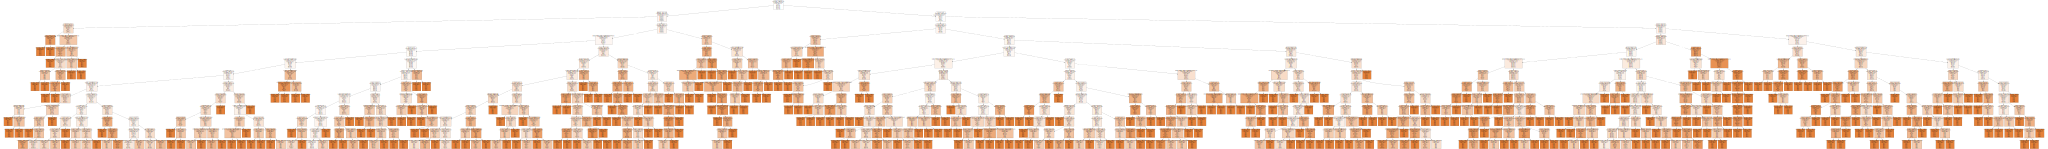

In [177]:
#Graficamos nuestro árbol de regresión
#@title Visualización de todo el árbol
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(model, feature_names=X_train.columns, filled=True))

SVG(graph.pipe(format="svg"))

# Predicción de nuestro modelo

In [178]:
# Realizamos las predicciones de nuestro modelo
pred = model.predict(X_test)

# Matriz de confusión

In [179]:
#Definimos un método que imprima y muestre la matriz de confusión
def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()  

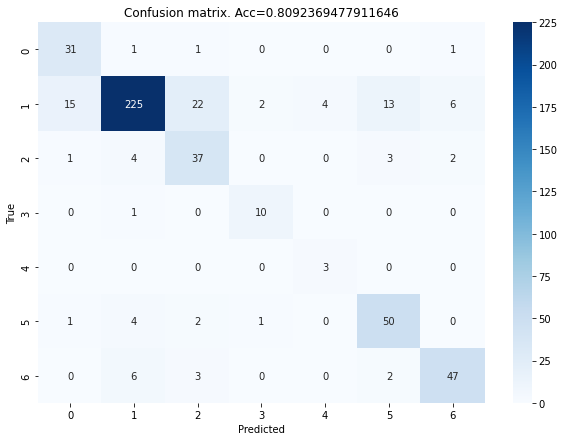

In [180]:
#Mostramos la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(X_test)
print_confusion_matrix(confusion_matrix(y_test.values.argmax(axis=1),pred.argmax(axis=1)), accuracy_score(y_test.values.argmax(axis=1), pred.argmax(axis=1)))

# Métricas de evaluación del modelo

In [181]:
from pandas._config.config import config_prefix
#Calculando las métricas de evaluación del modelo (Árbol de decisión por regresión)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

accur = "{:.4%}".format(accuracy_score(y_test.values.argmax(axis=1), pred.argmax(axis=1)))
#f1 = "{:.4%}".format(f1_score(y_test.values.argmax(axis=1), pred.argmax(axis=1),average='macro'))
recall = "{:.4%}".format(recall_score(y_test.values.argmax(axis=1), pred.argmax(axis=1), average='macro'))
precision = "{:.4%}".format(precision_score(y_test.values.argmax(axis=1), pred.argmax(axis=1), average='macro'))
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1),pred.argmax(axis=1))

print("Model Performance (Decision Tree Regression)")
print("Accuracy = "+ accur)
#print("F1-score = "+ f1)
print("Recall = "+ recall)
print("Precision = "+ precision)
print("Confusion Matrix:")
conf_matrix

Model Performance (Decision Tree Regression)
Accuracy = 80.9237%
Recall = 86.6354%
Precision = 70.3008%
Confusion Matrix:


array([[ 31,   1,   1,   0,   0,   0,   1],
       [ 15, 225,  22,   2,   4,  13,   6],
       [  1,   4,  37,   0,   0,   3,   2],
       [  0,   1,   0,  10,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0],
       [  1,   4,   2,   1,   0,  50,   0],
       [  0,   6,   3,   0,   0,   2,  47]])